## SVHN dataset analysis

In [1]:
%load_ext watermark

%watermark -a 'P.S. Aravind' -u -n -t -z -v -m -p numpy,scipy,matplotlib

P.S. Aravind 
last updated: Sun Oct 16 2016 20:26:34 UTC

CPython 2.7.6
IPython 4.1.1

numpy 1.11.2
scipy 0.13.3
matplotlib 1.5.1

compiler   : GCC 4.8.2
system     : Linux
release    : 4.4.20-moby
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


### Import python packages needed for analysis

In [2]:
import os
import struct
import numpy as np
import random
import gzip
from six.moves import cPickle as pickle
import matplotlib
import matplotlib.pyplot as plt
import PIL.Image as Image
import pandas as pd

%matplotlib inline

### Load compressed pickle files for Train, Validation and Test

In [3]:
pickle_file = './data/SVHN_train1.pklz'

with gzip.open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  X_train1 = save['X_train1']
  y_train1 = save['y_train1']
  del save
    
pickle_file = './data/SVHN_train2.pklz'

with gzip.open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  X_train2 = save['X_train2']
  y_train2 = save['y_train2']
  del save
    
pickle_file = './data/SVHN_train3.pklz'

with gzip.open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  X_train3 = save['X_train3']
  y_train3 = save['y_train3']
  del save
    
pickle_file = './data/SVHN_train4.pklz'

with gzip.open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  X_train4 = save['X_train4']
  y_train4 = save['y_train4']
  del save
    
X_train = np.concatenate(([X_train1, X_train2, X_train3, X_train4]))
y_train = np.concatenate(([y_train1, y_train2, y_train3, y_train4]))

del X_train1, X_train2, X_train3, X_train4
del y_train1, y_train2, y_train3, y_train4

In [4]:
pickle_file = './data/SVHN_valid.pklz'

with gzip.open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  X_valid = save['X_valid']
  y_valid = save['y_valid']
  del save
    
pickle_file = './data/SVHN_test.pklz'

with gzip.open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  X_test = save['X_test']
  y_test = save['y_test']
  del save

In [5]:
print('Train Data shape:', X_train.shape)
print('Train Labels shape:', y_train.shape)
print('Valid Data shape:', X_valid.shape)
print('Valid Labels shape:', y_valid.shape)
print('Test Data shape:', X_test.shape)
print('Test Labels shape:', y_test.shape)

('Train Data shape:', (188604, 32, 32, 1))
('Train Labels shape:', (188604, 7))
('Valid Data shape:', (47151, 32, 32, 1))
('Valid Labels shape:', (47151, 7))
('Test Data shape:', (13068, 32, 32, 1))
('Test Labels shape:', (13068, 7))


### Load labels into pandas dataframe for analysis

In [6]:
columns = ['length', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6',]
train_df = pd.DataFrame(data=y_train, columns=columns)
valid_df = pd.DataFrame(data=y_valid, columns=columns)
test_df = pd.DataFrame(data=y_test, columns=columns)

In [7]:
result = pd.concat([train_df.groupby('length').size(), 
                    valid_df.groupby('length').size(), 
                    test_df.groupby('length').size()], axis=1).fillna(0).astype(int)
result.columns = ['train', 'valid', 'test']
result

,train,valid,test
length,,,
1,11601,2921,2483
2,71881,17975,8356
3,92469,23011,2081
4,12548,3224,146
5,104,20,2
6,1,0,0


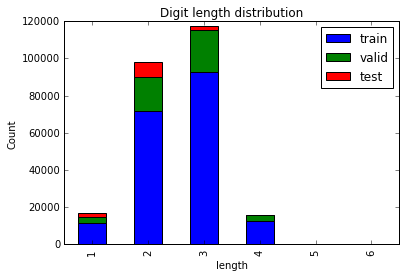

In [8]:
result.plot.bar(stacked='true', title='Digit length distribution')
plt.ylabel('Count')

In [9]:
def computeDigit(dataset):
    digit1 = dataset.groupby('digit_1').size()
    digit2 = dataset.groupby('digit_2').size()
    digit3 = dataset.groupby('digit_3').size()
    digit4 = dataset.groupby('digit_4').size()
    digit5 = dataset.groupby('digit_5').size()
    digits = pd.concat([digit1, digit2, digit3, digit4, digit5], axis=1).fillna(0).astype(int)
    digits.columns = ['digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5']
    digits.index.names = ['digit']
    digits = digits.drop(digits.index[[10]])
    digits['sum'] = digits['digit_1'] + digits['digit_2'] + digits['digit_3'] + digits['digit_4'] + digits['digit_5']
    return digits

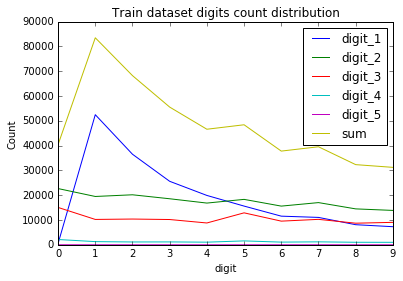

In [10]:
train_digits = computeDigit(train_df)
train_digits.plot(title='Train dataset digits count distribution')
plt.ylabel('Count')

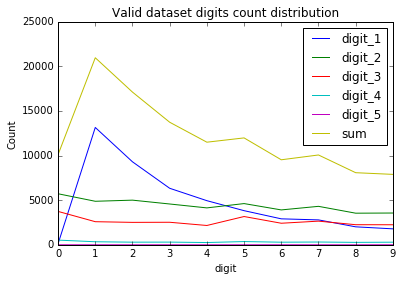

In [11]:
valid_digits = computeDigit(valid_df)
valid_digits.plot(title='Valid dataset digits count distribution')
plt.ylabel('Count')

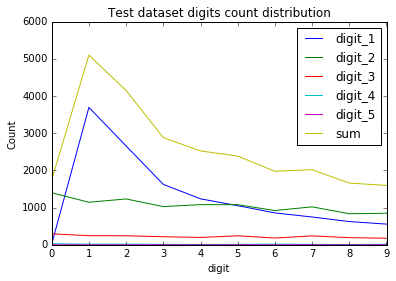

In [12]:
test_digits = computeDigit(test_df)
test_digits.plot(title='Test dataset digits count distribution')
plt.ylabel('Count')

In [13]:
matplotlib.rcParams.update({'font.size': 16})
image_size = 32

def display_dataset(dataset, labels):
    fig = plt.figure(figsize=(10,6))
    for i, item in enumerate(random.sample(range(len(labels)), 9)):
        plt.subplot(330 + i + 1)
        plt.imshow(dataset[item].reshape(image_size, image_size))
        label = ''.join(map(str, labels[item][1:labels[item][0]+1]))
        plt.title(label)
        plt.axis('off')
    plt.show()

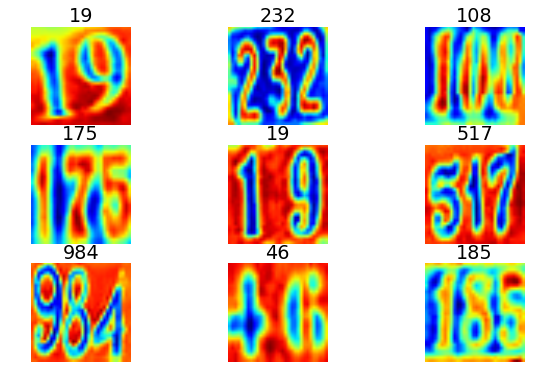

In [14]:
display_dataset(X_train, y_train)

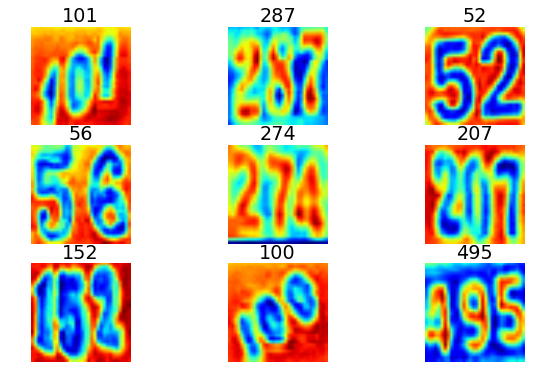

In [15]:
display_dataset(X_valid, y_valid)

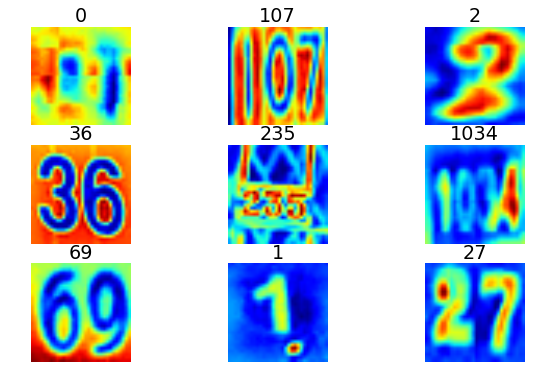

In [16]:
display_dataset(X_test, y_test)